In [23]:
# Import the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Section 1. --- Data loading and Inspection---
file_name='pokemon_data.csv'
df = pd.read_csv(file_name)

In [25]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head().to_markdown(index=False, numalign ="left", stralign ="left"))

First 5 rows of the DataFrame:
| id   | name       | base_experience   | height   | weight   | types         | abilities             | moves                                                        | stats                                                                           |
|:-----|:-----------|:------------------|:---------|:---------|:--------------|:----------------------|:-------------------------------------------------------------|:--------------------------------------------------------------------------------|
| 1    | bulbasaur  | 64                | 7        | 69       | grass, poison | overgrow, chlorophyll | razor-wind, swords-dance, cut, bind, vine-whip               | hp=45, attack=49, defense=49, special-attack=65, special-defense=65, speed=45   |
| 2    | ivysaur    | 142               | 10       | 130      | grass, poison | overgrow, chlorophyll | swords-dance, cut, bind, vine-whip, headbutt                 | hp=60, attack=62, defense=63, special-attack=80, specia

In [26]:
# Display information about the DataFrame
print("\nInformation  about the DataFrame:")
print(df.info())


Information  about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1302 non-null   int64 
 1   name             1302 non-null   object
 2   base_experience  1302 non-null   int64 
 3   height           1302 non-null   int64 
 4   weight           1302 non-null   int64 
 5   types            1302 non-null   object
 6   abilities        1302 non-null   object
 7   moves            1268 non-null   object
 8   stats            1302 non-null   object
dtypes: int64(4), object(5)
memory usage: 91.7+ KB
None


In [27]:
# Section 2. --- Data Cleaning and Extraction ---
# Extract indivisual stats fromt the 'stats' column using regex
stats_df =df['stats'].str.extract(r'hp=(\d+),\s*attack=(\d+),\s*defense=(\d+),\s*special-attack=(\d+),\s*special-defense=(\d+),\s*speed=(\d+)')
stats_df.columns= ['HP', 'Attack', 'Defense', 'Special_Attack', 'Special_Defense', 'Speed']
stats_df = stats_df.astype(int)

In [28]:
# Concatenate the extracted stats with the original DataFrame
df=pd.concat([df, stats_df], axis=1)

In [29]:
#calculate the'Total' stat by summing the indivisual stats
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Special_Attack'] + df['Special_Defense'] + df['Speed']         

In [30]:
# Extract 'Type 1' and 'Type 2' from the 'type' column 
df[['Type 1', 'Type 2']] = df['types'].str.split(',\s*', expand=True, n=1)

# Display the updated DataFrame info and head to verify the new column
print("\nUpdated DataFrame Info:")
print(df.info())

print("\nFirst 5 rows of the updated DataFrame:")
print(df.head().to_markdown(index=False, numalign="left" , stralign="left"))


Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1302 non-null   int64 
 1   name             1302 non-null   object
 2   base_experience  1302 non-null   int64 
 3   height           1302 non-null   int64 
 4   weight           1302 non-null   int64 
 5   types            1302 non-null   object
 6   abilities        1302 non-null   object
 7   moves            1268 non-null   object
 8   stats            1302 non-null   object
 9   HP               1302 non-null   int32 
 10  Attack           1302 non-null   int32 
 11  Defense          1302 non-null   int32 
 12  Special_Attack   1302 non-null   int32 
 13  Special_Defense  1302 non-null   int32 
 14  Speed            1302 non-null   int32 
 15  Total            1302 non-null   int32 
 16  Type 1           1302 non-null   object
 17  Type 2  

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_18308\974722575.py:2: SyntaxWarning: invalid escape sequence '\s'
  df[['Type 1', 'Type 2']] = df['types'].str.split(',\s*', expand=True, n=1)


In [32]:
# ---Exploratory Data Analysis (EDA)---
# Calculate descriptive statistics for the extracted numerical columns
numerical_cols =['HP' , 'Attack', 'Defense' , 'Special_Attack' , 'Special_Defense' , 'Speed' , 'Total' , 'base_experience' , 'height','weight']
print("\nDescriptive statistics for numerical columns:")
print(df[numerical_cols].describe().T.to_markdown(numalign ="left" , stralign ="left"))


Descriptive statistics for numerical columns:
|                 | count   | mean    | std     | min   | 25%   | 50%   | 75%   | max   |
|:----------------|:--------|:--------|:--------|:------|:------|:------|:------|:------|
| HP              | 1302    | 71.3149 | 26.8689 | 1     | 54    | 70    | 85    | 255   |
| Attack          | 1302    | 81.5883 | 31.6775 | 5     | 58    | 80    | 100   | 190   |
| Defense         | 1302    | 75.2419 | 30.4926 | 5     | 53    | 70    | 95    | 250   |
| Special_Attack  | 1302    | 73.6682 | 32.4955 | 10    | 50    | 65    | 95    | 194   |
| Special_Defense | 1302    | 72.967  | 27.3581 | 20    | 52    | 70    | 90    | 250   |
| Speed           | 1302    | 71.1567 | 30.3103 | 5     | 48    | 70    | 92    | 200   |
| Total           | 1302    | 445.937 | 119.997 | 175   | 335   | 470   | 525   | 1125  |
| base_experience | 1302    | 161.944 | 82.5326 | 36    | 71    | 165   | 222.5 | 608   |
| height          | 1302    | 20.4677 | 54.1803 | 1  

In [36]:
# Find value counts for ' Type 1' and ' Type 2'
print("\nValue counts for 'Type 1':")
print(df['Type 1'].value_counts().to_markdown(numalign="left", stralign ="left"))

print("\nValue counts for 'Type 2':")
print(df['Type 1'].value_counts().to_markdown(numalign ="left" , stralign ="left"))


Value counts for 'Type 1':
| Type 1   | count   |
|:---------|:--------|
| water    | 157     |
| normal   | 138     |
| grass    | 118     |
| electric | 96      |
| bug      | 93      |
| psychic  | 83      |
| rock     | 81      |
| fire     | 80      |
| dark     | 59      |
| fighting | 57      |
| dragon   | 52      |
| ghost    | 51      |
| poison   | 51      |
| steel    | 49      |
| ground   | 48      |
| ice      | 43      |
| fairy    | 33      |
| flying   | 13      |

Value counts for 'Type 2':
| Type 1   | count   |
|:---------|:--------|
| water    | 157     |
| normal   | 138     |
| grass    | 118     |
| electric | 96      |
| bug      | 93      |
| psychic  | 83      |
| rock     | 81      |
| fire     | 80      |
| dark     | 59      |
| fighting | 57      |
| dragon   | 52      |
| ghost    | 51      |
| poison   | 51      |
| steel    | 49      |
| ground   | 48      |
| ice      | 43      |
| fairy    | 33      |
| flying   | 13      |


In [38]:
# Combine Type 1 and Type 2 for a total count of types
all_types = pd.concat([df['Type 1'], df['Type 2']]).dropna()
print("\nCombined value counts for all types:")
print(all_types.value_counts().to_markdown(numalign="left" , stralign ="left"))


Combined value counts for all types:
|          | count   |
|:---------|:--------|
| water    | 186     |
| normal   | 158     |
| grass    | 152     |
| flying   | 149     |
| psychic  | 136     |
| electric | 110     |
| dragon   | 107     |
| bug      | 104     |
| fire     | 103     |
| poison   | 102     |
| rock     | 102     |
| fighting | 100     |
| dark     | 94      |
| ground   | 93      |
| ghost    | 92      |
| steel    | 91      |
| fairy    | 83      |
| ice      | 66      |


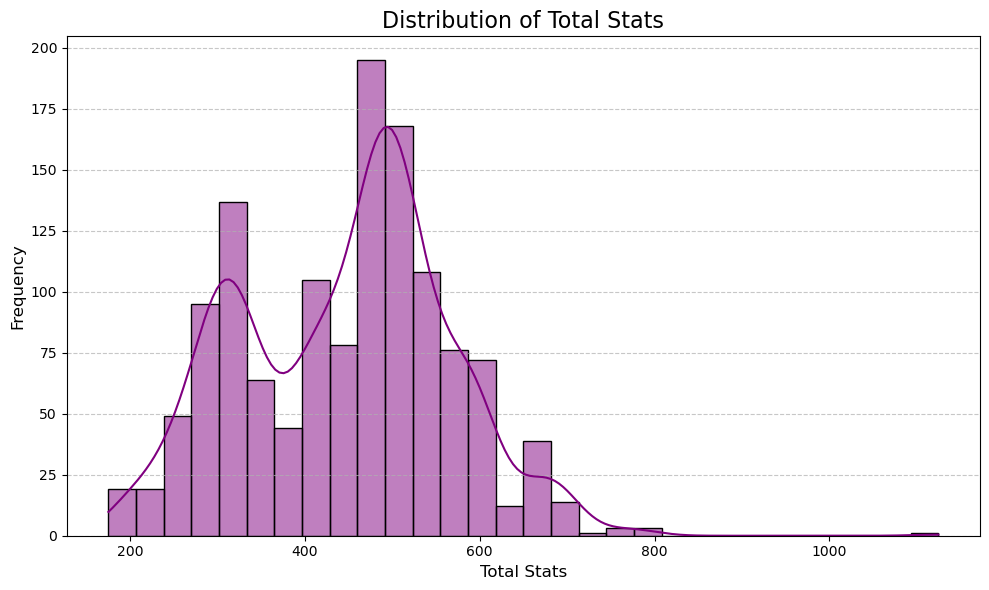

In [40]:
# Section 3. ---Visualization---
# Create a histogram for the 'Total' stat distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Total'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Stats', fontsize=16)
plt.xlabel('Total Stats', fontsize =12)
plt.ylabel('Frequency' , fontsize=12)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.tight_layout()
plt.savefig('total_stats_distribution.png')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_18308\1471572020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.index, y=top_types.values, palette='viridis')


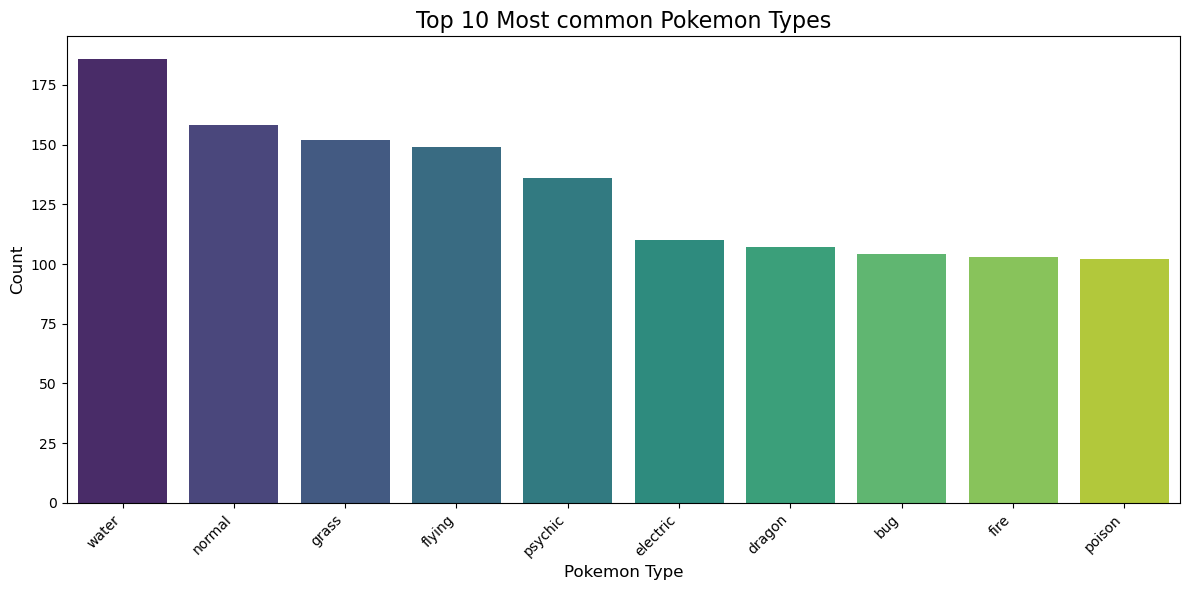

In [42]:
# Create a bar chart for the top 10 combined types
top_types = all_types.value_counts().head(10).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.index, y=top_types.values, palette='viridis')
plt.title('Top 10 Most common Pokemon Types', fontsize=16)
plt.xlabel('Pokemon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha ='right')
plt.tight_layout()
plt.savefig('top_10_pokemon_types.png')

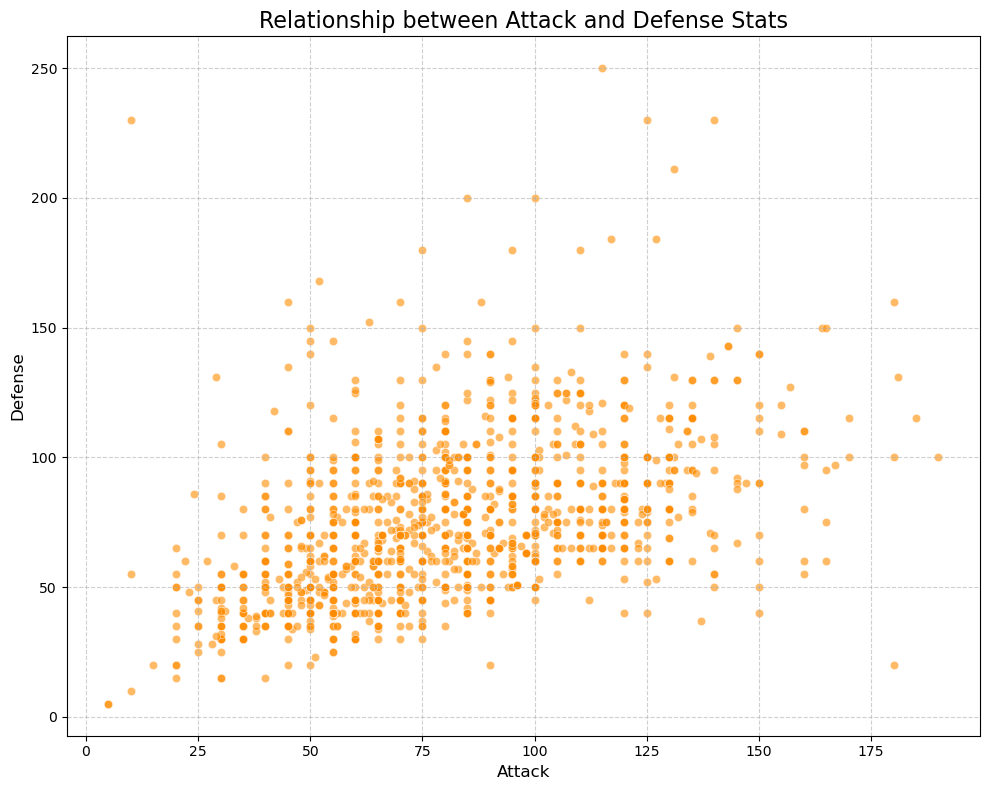

In [43]:
# Create a scatter plot of Attack vs. Defense
plt.figure(figsize=(10,8))
sns.scatterplot(x='Attack', y='Defense', data=df, alpha=0.6, color='darkorange')
plt.title('Relationship between Attack and Defense Stats', fontsize=16)
plt.xlabel('Attack', fontsize=12)
plt.ylabel('Defense', fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('attack_vs_defense.png')

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_18308\2652938675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type 1', y='Total', data=df, order=top_type1_order, palette='Set2')


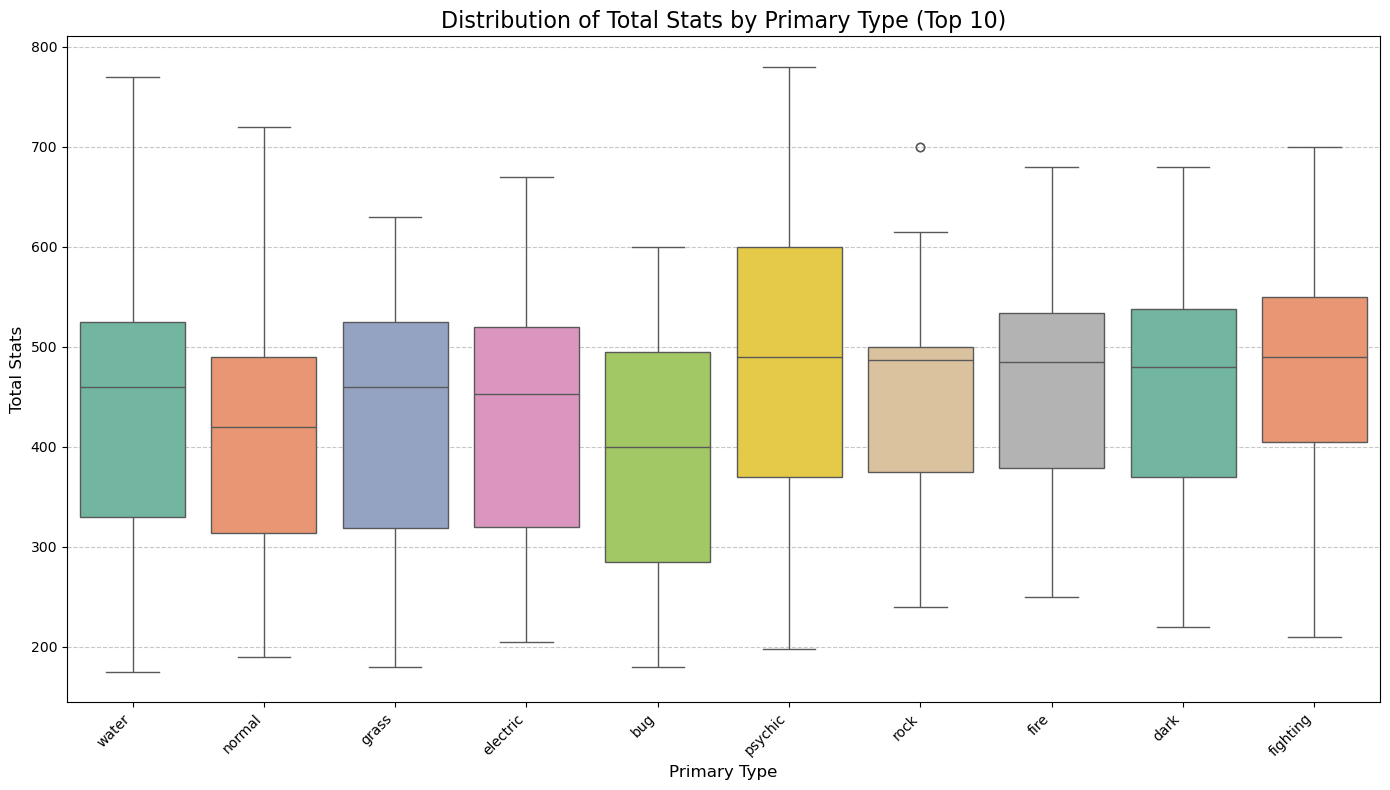

In [44]:
# Create a boxplot of Total stats by the top 10 'Type 1' s
top_type1_order= df['Type 1'].value_counts().head(10).index
plt.figure(figsize=(14,8))
sns.boxplot(x='Type 1', y='Total', data=df, order=top_type1_order, palette='Set2')
plt.title('Distribution of Total Stats by Primary Type (Top 10)', fontsize=16)
plt.xlabel('Primary Type', fontsize=12)
plt.ylabel('Total Stats', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('total_stats_by_type1.png')